<a href="https://colab.research.google.com/github/mohitshah3111999/Facial-Expression-Recognition/blob/main/BTP_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [ ]:
drive.mount('/content/drive')
%cd drive/MyDrive/facial_expression/

Mounted at /content/drive
/content/drive/MyDrive/facial_expression


In [ ]:
data = pd.read_csv("fer2013/fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
label_to_text = {0: "anger", 1: "disgust", 2: "fear", 3: "happiness", 4: "sadness", 5: "surprise", 6: "neutral"}

In [ ]:
groups = [g for _, g in data.groupby('emotion')]
for group in groups:
  cur_emotion = label_to_text[group['emotion'].unique()[0]]
  print("Emotion is: {}".format(cur_emotion))
  groupbyUsage = [g for _, g in group.groupby('Usage')]  
  print(len(groupbyUsage[2]), len(groupbyUsage[1]), len(groupbyUsage[0]), len(groupbyUsage[2]) + len(groupbyUsage[1]) + len(groupbyUsage[0]))

Emotion is: anger
3995 467 491 4953
Emotion is: disgust
436 56 55 547
Emotion is: fear
4097 496 528 5121
Emotion is: happiness
7215 895 879 8989
Emotion is: sadness
4830 653 594 6077
Emotion is: surprise
3171 415 416 4002
Emotion is: neutral
4965 607 626 6198


In [ ]:
groups = [g for _, g in data.groupby('Usage')]
train = groups[2]
val = groups[1]
test = groups[0]

In [ ]:
train = train.drop(labels=['Usage'], axis=1)
val = val.drop(labels=['Usage'], axis=1)
test = test.drop(labels=['Usage'], axis=1)

Y_train = train["emotion"]
Y_val = val["emotion"]
Y_test = test["emotion"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Counts per emotion in testing set')

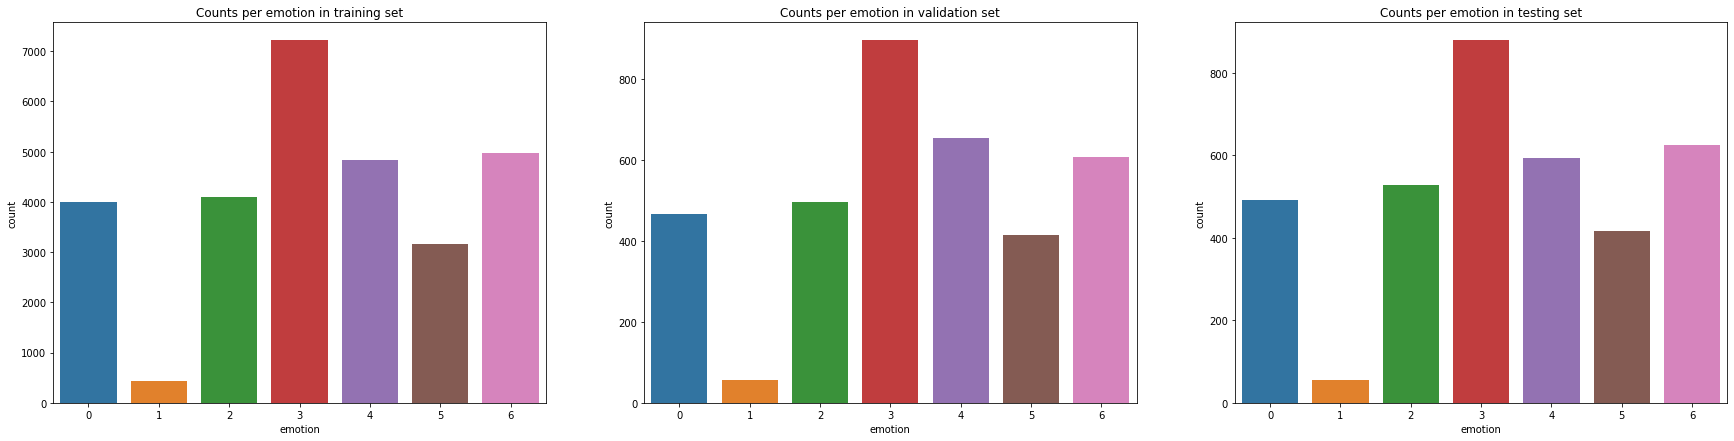

In [ ]:
plt.figure(figsize=(30, 7))

plt.subplot(1,3,1)
ax = seaborn.countplot(Y_train)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in training set")

plt.subplot(1,3,2)
ax = seaborn.countplot(Y_val)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in validation set")

plt.subplot(1,3,3)
ax = seaborn.countplot(Y_test)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in testing set")